In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('phishing.csv')

specific_columns = ['ServerFormHandler', 'RequestURL', 'UsingIP', 'HTTPS', 'WebsiteTraffic', 'URLLength', 'AnchorURL', 'UsingPopupWindow', 'result'] 
df_specific = data[specific_columns]

df_specific.head()

,ServerFormHandler,RequestURL,UsingIP,HTTPS,WebsiteTraffic,URLLength,AnchorURL,UsingPopupWindow,result
0,-1,1,1,1,0,1,0,1,-1
1,-1,1,1,-1,1,-1,0,1,-1
2,-1,-1,1,-1,1,1,0,1,-1
3,-1,1,1,1,0,0,0,-1,1
4,-1,1,-1,1,1,-1,0,1,1


In [27]:
data = df_specific

In [28]:
data.shape

(11054, 9)

In [29]:
data.columns

Index(['ServerFormHandler', 'RequestURL', 'UsingIP', 'HTTPS', 'WebsiteTraffic',
       'URLLength', 'AnchorURL', 'UsingPopupWindow', 'result'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ServerFormHandler  11054 non-null  int64
 1   RequestURL         11054 non-null  int64
 2   UsingIP            11054 non-null  int64
 3   HTTPS              11054 non-null  int64
 4   WebsiteTraffic     11054 non-null  int64
 5   URLLength          11054 non-null  int64
 6   AnchorURL          11054 non-null  int64
 7   UsingPopupWindow   11054 non-null  int64
 8   result             11054 non-null  int64
dtypes: int64(9)
memory usage: 777.4 KB


In [31]:
data.nunique()

ServerFormHandler    3
RequestURL           2
UsingIP              2
HTTPS                3
WebsiteTraffic       3
URLLength            3
AnchorURL            3
UsingPopupWindow     2
result               2
dtype: int64

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ServerFormHandler,11054.0,-0.595712,0.759168,-1.0,-1.0,-1.0,-1.0,1.0
RequestURL,11054.0,0.186720,0.982458,-1.0,-1.0,1.0,1.0,1.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
WebsiteTraffic,11054.0,0.287407,0.827680,-1.0,0.0,1.0,1.0,1.0
URLLength,11054.0,0.001990,0.819223,-1.0,-1.0,0.0,1.0,1.0
AnchorURL,11054.0,-0.076443,0.715116,-1.0,-1.0,0.0,0.0,1.0
UsingPopupWindow,11054.0,0.613353,0.789845,-1.0,1.0,1.0,1.0,1.0
result,11054.0,0.113986,0.993527,-1.0,-1.0,1.0,1.0,1.0


Visualizing the Data


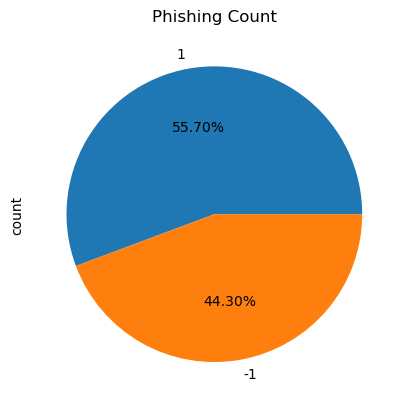

In [33]:
data['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

# Splitting the Data

The data is split into train & test sets, 80-20 split.


In [34]:
X = data.drop(["result"],axis =1)
y = data["result"]

In [35]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 8), (8843,), (2211, 8), (2211,))

In [36]:
ml_model = []
accuracy = []
f1_score = []
recall = []
precision = []

In [37]:
#function to call for storing the results
def storeResults(model,a,b,c,d):
    ml_model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d ,3))

# Logistic Regression

In [38]:
# instantiate the model
log = LogisticRegression()

In [39]:
# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [40]:
#predicting the target value from the model for the samples
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [41]:
#computing accuracy , score , recall , precision of the model
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()


f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))


Logistic Regression : Accuracy on training Data: 0.909
Logistic Regression : Accuracy on test Data: 0.916

Logistic Regression : f1_score on training Data: 0.921
Logistic Regression : f1_score on test Data: 0.926

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.947

Logistic Regression : precision on training Data: 0.899
Logistic Regression : precision on test Data: 0.907


In [42]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_log))  

              precision    recall  f1-score   support

          -1       0.93      0.88      0.90       976
           1       0.91      0.95      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.92      0.91      0.91      2211
weighted avg       0.92      0.92      0.92      2211



In [43]:
#Store the results.
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

# K-Nearest Neighbors : Classifier

In [44]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [46]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.914
K-Nearest Neighbors : Accuracy on test Data: 0.904

K-Nearest Neighbors : f1_score on training Data: 0.924
K-Nearest Neighbors : f1_score on test Data: 0.915

K-Nearest Neighborsn : Recall on training Data: 0.940
Logistic Regression : Recall on test Data: 0.929

K-Nearest Neighbors : precision on training Data: 0.908
K-Nearest Neighbors : precision on test Data: 0.902


In [47]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.91      0.87      0.89       976
           1       0.90      0.93      0.92      1235

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



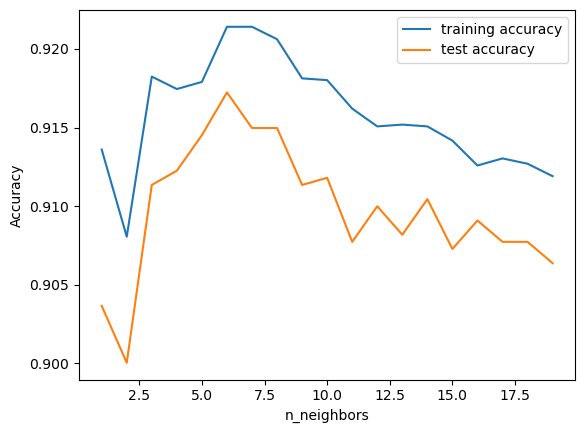

In [48]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [49]:
#store results
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,recall_score_train_knn,precision_score_train_knn)

#  Support Vector Machine : Classifier

In [50]:
# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}
svc = GridSearchCV(SVC(), param_grid)
# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [51]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [52]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.916
Support Vector Machine : Accuracy on test Data: 0.921

Support Vector Machine : f1_score on training Data: 0.926
Support Vector Machine : f1_score on test Data: 0.930

Support Vector Machine : Recall on training Data: 0.942
Support Vector Machine : Recall on test Data: 0.943

Support Vector Machine : precision on training Data: 0.910
Support Vector Machine : precision on test Data: 0.918


In [53]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91       976
           1       0.92      0.94      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [54]:
#store Results
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,recall_score_train_svc,precision_score_train_svc)

# Naive Bayes : Classifier

In [55]:
# instantiate the model
nb=  GaussianNB()
# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [56]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [57]:
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))


Naive Bayes Classifier : Accuracy on training Data: 0.902
Naive Bayes Classifier : Accuracy on test Data: 0.909

Naive Bayes Classifier : f1_score on training Data: 0.913
Naive Bayes Classifier : f1_score on test Data: 0.919

Naive Bayes Classifier : Recall on training Data: 0.921
Naive Bayes Classifier : Recall on test Data: 0.927

Naive Bayes Classifier : precision on training Data: 0.904
Naive Bayes Classifier : precision on test Data: 0.912


In [58]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.91       976
           1       0.92      0.94      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [59]:
#store Result
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,recall_score_train_nb,precision_score_train_nb)

# Decision Trees : Classifier

In [60]:
tree = DecisionTreeClassifier(max_depth=30)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [61]:
#predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [62]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.929
Decision Tree : Accuracy on test Data: 0.925

Decision Tree : f1_score on training Data: 0.937
Decision Tree : f1_score on test Data: 0.933

Decision Tree : Recall on training Data: 0.940
Decision Tree : Recall on test Data: 0.935

Decision Tree : precision on training Data: 0.933
Decision Tree : precision on test Data: 0.931


In [63]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       976
           1       0.93      0.94      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [64]:
training_accuracy = []
test_accuracy = []

depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    
    test_accuracy.append(tree_test.score(X_test, y_test))

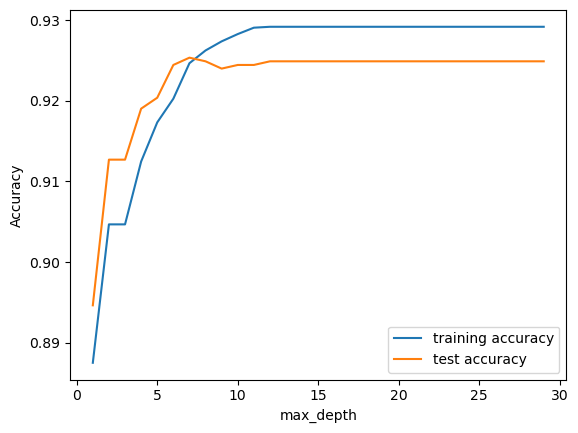

In [65]:
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [66]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

# Random Forest : Classifier 

In [67]:
# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train) 

RandomForestClassifier(n_estimators=10)

In [68]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [69]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.929
Random Forest : Accuracy on test Data: 0.923

Random Forest : f1_score on training Data: 0.936
Random Forest : f1_score on test Data: 0.931

Random Forest : Recall on training Data: 0.940
Random Forest : Recall on test Data: 0.932

Random Forest : precision on training Data: 0.933
Random Forest : precision on test Data: 0.931


In [70]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       976
           1       0.93      0.93      0.93      1235

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



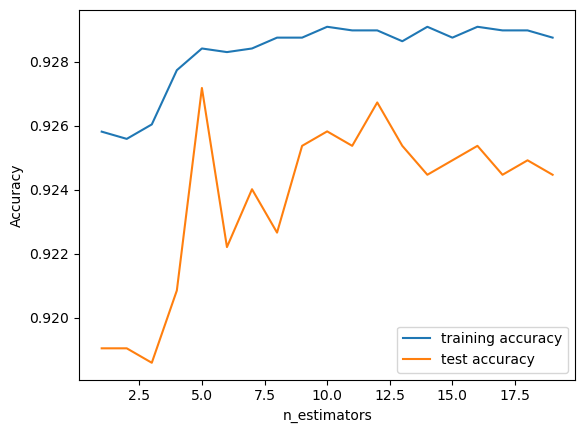

In [71]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [72]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

# Gradient Boost

In [73]:
# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [74]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [75]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))

Gradient Boost: Accuracy on training Data: 0.929
Gradient Boost: Accuracy on test Data: 0.924

Gradient Boost : f1_score on training Data: 0.936
Gradient Boost : f1_score on test Data: 0.932

Gradient Boost : Recall on training Data: 0.941
Gradient Boost : Recall on test Data: 0.941

Gradient Boost : precision on training Data: 0.931
Gradient Boost : precision on test Data: 0.931


In [76]:
storeResults('Gradient Boost ',acc_test_gbc,f1_score_test_gbc,recall_score_train_gbc,precision_score_train_gbc)

In [77]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ml_model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [78]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.916,0.926,0.943,0.899
1,K-Nearest Neighbors,0.904,0.915,0.940,0.908
2,Support Vector Machine,0.921,0.930,0.942,0.910
3,Naive Bayes Classifier,0.909,0.919,0.921,0.904
4,Decision Tree,0.925,0.933,0.940,0.933
5,Random Forest,0.923,0.931,0.940,0.933
6,Gradient Boost,0.924,0.932,0.941,0.931


In [79]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)


In [80]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.925,0.933,0.940,0.933
1,Gradient Boost,0.924,0.932,0.941,0.931
2,Random Forest,0.923,0.931,0.940,0.933
3,Support Vector Machine,0.921,0.930,0.942,0.910
4,Logistic Regression,0.916,0.926,0.943,0.899
5,Naive Bayes Classifier,0.909,0.919,0.921,0.904
6,K-Nearest Neighbors,0.904,0.915,0.940,0.908


In [81]:
#make prediction using gbc classifier because it has good accuracy
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

In [82]:
# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [83]:
y_train_gbc = gbc.predict(X_train)

In [84]:
y_test_gbc = gbc.predict(X_test)

In [85]:
print(y_test_gbc)

[-1  1  1 ...  1  1  1]


In [86]:
print(y_train_gbc)

[-1 -1  1 ...  1  1 -1]


In [87]:
gbc.score(X_test,y_test)

0.9240162822252375

In [88]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boost: Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boost: Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boost : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boost : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc = metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boost : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boost : Recall on test Data: {:.3f}".format(recall_score_train_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boost : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boost : precision on test Data: {:.3f}".format(precision_score_train_gbc))


Gradient Boost: Accuracy on training Data: 0.929
Gradient Boost: Accuracy on test Data: 0.924

Gradient Boost : f1_score on training Data: 0.936
Gradient Boost : f1_score on test Data: 0.932

Gradient Boost : Recall on training Data: 0.941
Gradient Boost : Recall on test Data: 0.941

Gradient Boost : precision on training Data: 0.931
Gradient Boost : precision on test Data: 0.931


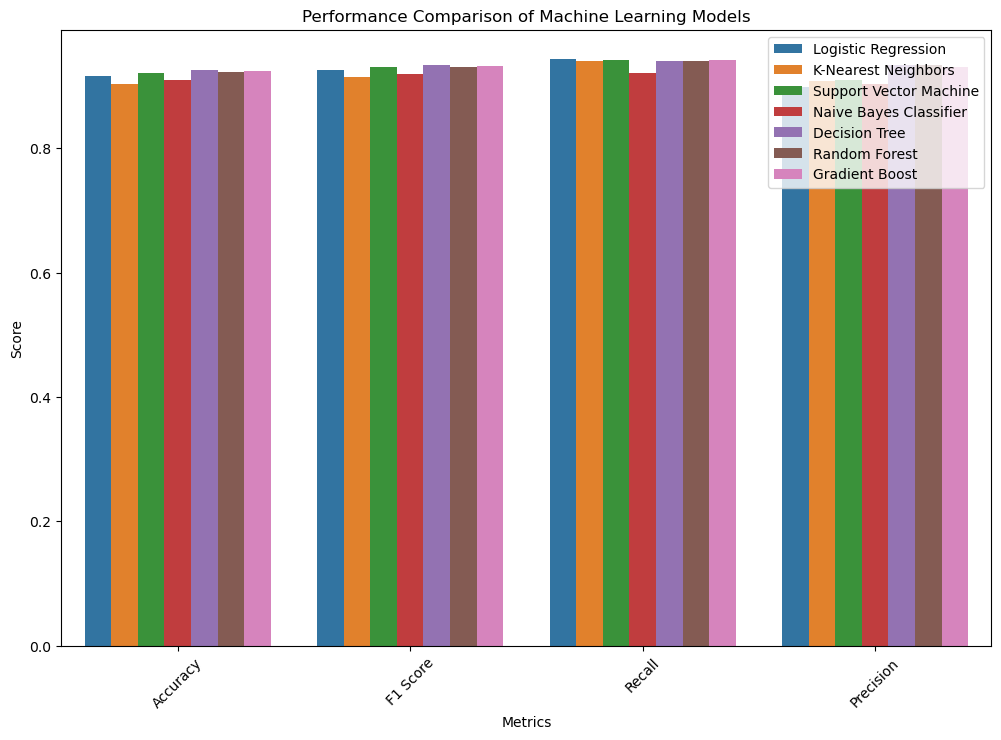

In [89]:
metrics_df = pd.DataFrame({
    'ML Model': ml_model,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall': recall,
    'Precision': precision
})

metrics_melted = pd.melt(metrics_df, id_vars=['ML Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='ML Model', data=metrics_melted)
plt.title('Performance Comparison of Machine Learning Models')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

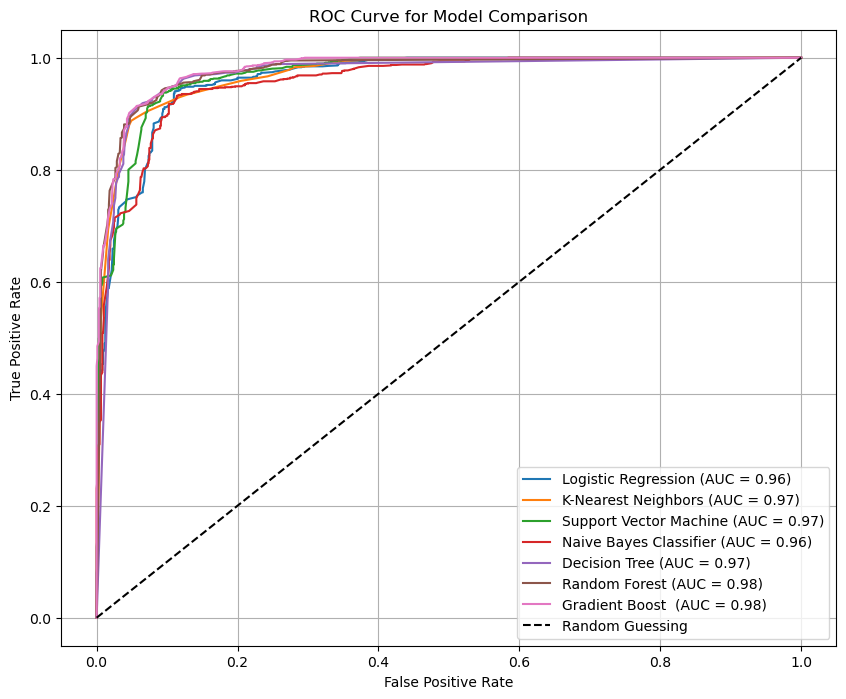

In [90]:
# Create a figure and axis object
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
for model_name, model in zip(ml_model, [log, knn, svc, nb, tree, forest, gbc]):
    # Predict probabilities for positive class
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(X_test)[:, 1]
    else:  # use decision function for SVC
        prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

# Plot random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

In [91]:
best_model_name = sorted_result.iloc[0]['ML Model'] 
best_model = None 

# Determine which model corresponds to the best_model_name and assign the model object to best_model
if best_model_name == 'Logistic Regression':
    best_model = log
elif best_model_name == 'K-Nearest Neighbors':
    best_model = knn
elif best_model_name == 'Support Vector Machine':
    best_model = svc
elif best_model_name == 'Naive Bayes Classifier':
    best_model = nb
elif best_model_name == 'Decision Tree':
    best_model = tree
elif best_model_name == 'Random Forest':
    best_model = forest
elif best_model_name == 'Gradient Boost':
    best_model = gbc

from joblib import dump

# Save the best model
dump(best_model, 'best_model.joblib')
print(best_model)

DecisionTreeClassifier(max_depth=30)


In [92]:
data.head()

,ServerFormHandler,RequestURL,UsingIP,HTTPS,WebsiteTraffic,URLLength,AnchorURL,UsingPopupWindow,result
0,-1,1,1,1,0,1,0,1,-1
1,-1,1,1,-1,1,-1,0,1,-1
2,-1,-1,1,-1,1,1,0,1,-1
3,-1,1,1,1,0,0,0,-1,1
4,-1,1,-1,1,1,-1,0,1,1
